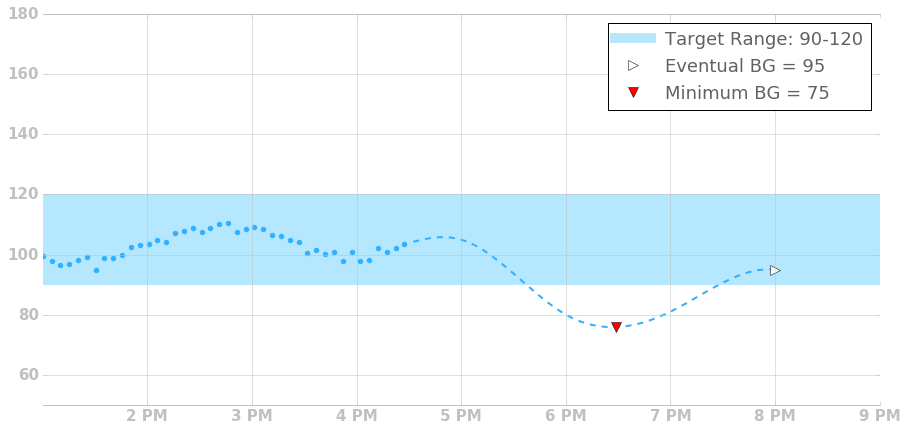

In [118]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import spline

x = np.array([1,2,3,4,5,6,7,8])
y = [100, 105, 110, 100,105,80,81,95]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

f,a = plt.subplots()
f.set_size_inches(15, 7)
plt.ylim([50,180])
plt.xlim([1,7])

a.spines['bottom'].set_color(coord_color)
a.spines['top'].set_color(coord_color)
a.spines['left'].set_color(coord_color)
a.spines['right'].set_color(coord_color)
a.xaxis.label.set_color(coord_color)
a.tick_params(axis='x', colors=coord_color)
a.yaxis.label.set_color(coord_color)
a.tick_params(axis='y', colors=coord_color)
a.spines['right'].set_visible(False)
a.spines['left'].set_visible(False)
coord_color = "#c0c0c0"


# Data
x_ticks = [2,3,4,5,6,7,8,9]
labels = ["%d PM" % x1 for x1 in x_ticks]
plt.xticks(x_ticks, labels)

x_smooth = np.linspace(x.min(), x.max(), ((x.max() - x.min()) * 60 / 5))
y_smooth = spline(x, y, x_smooth)

x_hist, x_predict = np.split(x_smooth, 2)
y_hist, y_predict = np.split(y_smooth, 2)

noise = np.random.normal(-1,1,len(y_hist))
noise[-1] = 0

target_min = 90
target_max = 120

# Target Range
a.fill_between([1,9], [target_min,target_min], [target_max,target_max], facecolor='#B5E7FF', lw=0)
plt.plot([], [], color='#B5E7FF', linewidth=10, label="Target Range: %d-%d" % (target_min,target_max))

# background grid
a.grid(ls='-',color=coord_color)

# Plot mock CGM data
plt.scatter(x_hist,y_hist+noise, color="#31B0FF")

# Plot mock forecast
plt.plot(x_predict,y_predict, linestyle="--", color="#31B0FF", lw=2)

# Plot eventual BG
plt.plot(x_predict[-1],y_predict[-1], marker='>', markersize=10, color="white", ls="None", label="Eventual BG = %d" % y_predict[-1])

# Plot minimum BG
min_idx = np.argmin(y_predict)
plt.plot(x_predict[min_idx],y_predict[min_idx], marker='v', markersize=10, color="red", ls="None", label="Minimum BG = %d" % y_predict[min_idx])

l = plt.legend(numpoints=1)
for text in l.get_texts():
    text.set_color('#606060')
    text.set_weight('normal')

plt.show()

In [76]:
y_predict[-2:-1]

array([ 95.10543518])